# НЕІЄРАРХІЧНІ МЕТОДИ КЛАСТЕРНОГО АНАЛІЗУ

3. Завантажити дані відповідно до вашого варіанту (табл. 5.1). Побудувати графічне зображення експериментальних даних (диаграму розсіювання). Візуально оцінити кількість
кластерів k за побудованим зображенням.
4. Розробити алгоритм кластерізації k-середніх і програмно його
реалізувати в середовищі MATLAB.
5. Виконати кластерний аналіз висхідних даних методом k-
середніх (параметри методу див. в табл. Е.1). Визначити
найбільш оптимальну кількість кластерів k.
6. Розрахувати центри отриманих кластерів. Відобразити
графічно знайдені кластери (використати диаграму
розсіювання у кольорі).

Вариант 4 
Метрика (расстояние)- Евклидова 
функционал качества кластеризации -Q1
данные - data4.txt

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

## LOAD DATA

In [16]:
df = pd.read_csv('insurance.csv')

In [17]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Columns explanation

    age: age of primary beneficiary

    sex: insurance contractor gender, female, male

    bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
    objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

    children: Number of children covered by health insurance / Number of dependents

    smoker: Smoking

    region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

    charges: Individual medical costs billed by health insurance


## DATA PREPARATION

In [20]:
df['smoker'] = df['smoker'].map({'yes':1,'no':0})

In [21]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350
1336,21,female,25.800,0,0,southwest,2007.94500


In [49]:
df['charges'] = (df.charges.round()//1000).astype(int)

In [50]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16
1,18,male,33.770,1,0,southeast,1
2,28,male,33.000,3,0,southeast,4
3,33,male,22.705,0,0,northwest,21
4,32,male,28.880,0,0,northwest,3
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10
1334,18,female,31.920,0,0,northeast,2
1335,18,female,36.850,0,0,southeast,1
1336,21,female,25.800,0,0,southwest,2


In [22]:
df.describe()

,age,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,0.204783,13270.422265
std,14.049960,6.098187,1.205493,0.403694,12110.011237
min,18.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,53.130000,5.000000,1.000000,63770.428010


In [23]:
df.isnull().any().any()

False

## DATA VISUALIZATION

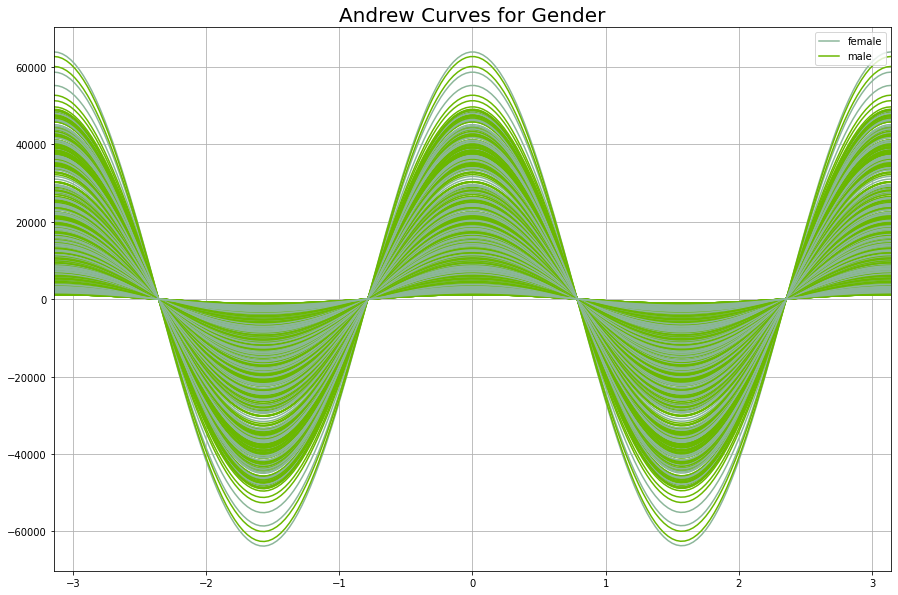

In [26]:
from pandas import plotting
# plt.rcParams['figure.figsize'] = (15, 10)


plotting.andrews_curves(df.drop(['region'],axis=1), "sex")
plt.title('Andrew Curves for Gender', fontsize = 20)
plt.show()

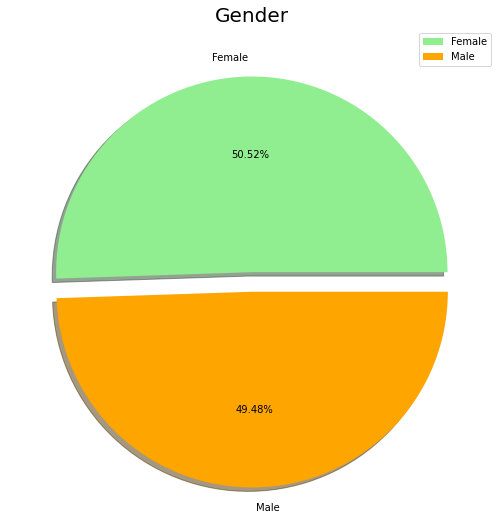

In [27]:


labels = ['Female', 'Male']
size = df['sex'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()



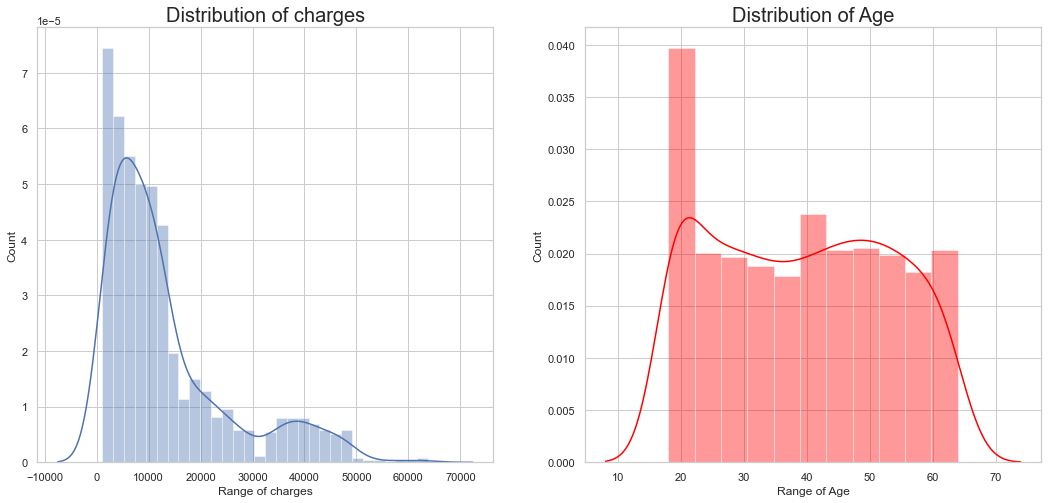

In [30]:


import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(df['charges'])
plt.title('Distribution of charges', fontsize = 20)
plt.xlabel('Range of charges')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(df['age'], color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()



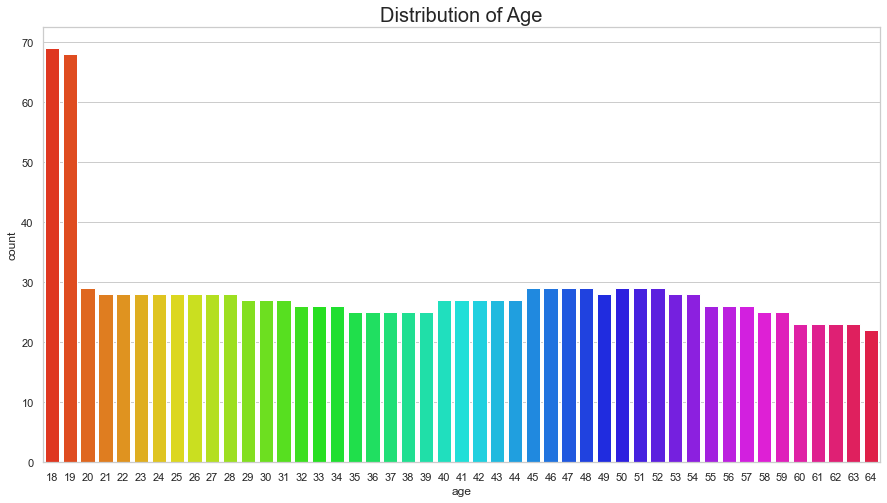

In [32]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(df['age'], palette = 'hsv')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

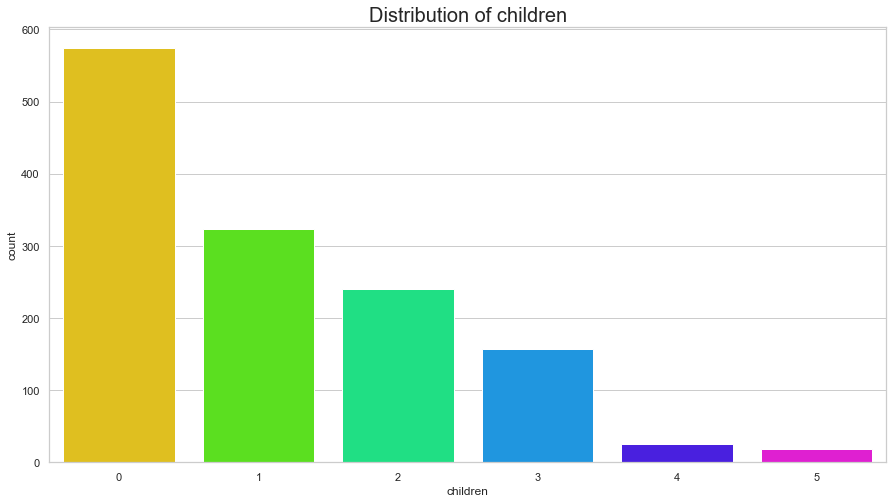

In [34]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(df['children'], palette = 'hsv')
plt.title('Distribution of children', fontsize = 20)
plt.show()

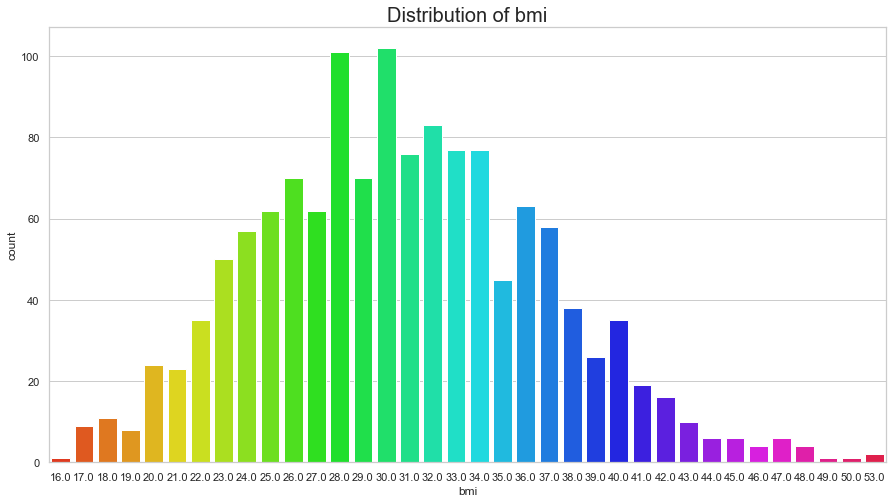

In [40]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(df['bmi'].round(0), palette = 'hsv')
plt.title('Distribution of bmi', fontsize = 20)
plt.show()

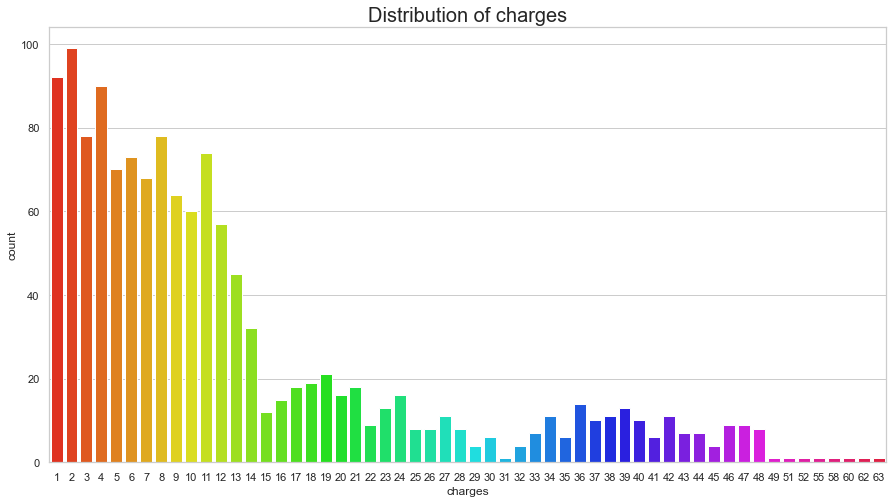

In [51]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(df['charges'].round(0), palette = 'hsv')
plt.title('Distribution of charges', fontsize = 20)
plt.show()

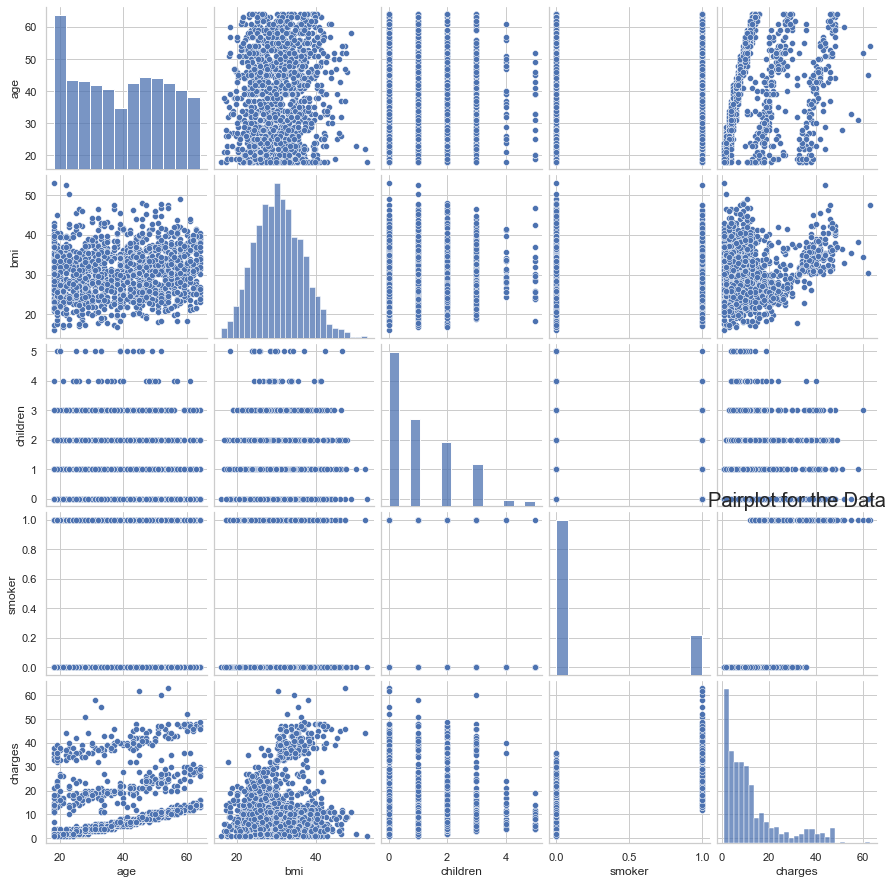

In [52]:
sns.pairplot(df)
plt.title('Pairplot for the Data', fontsize = 20)
plt.show()

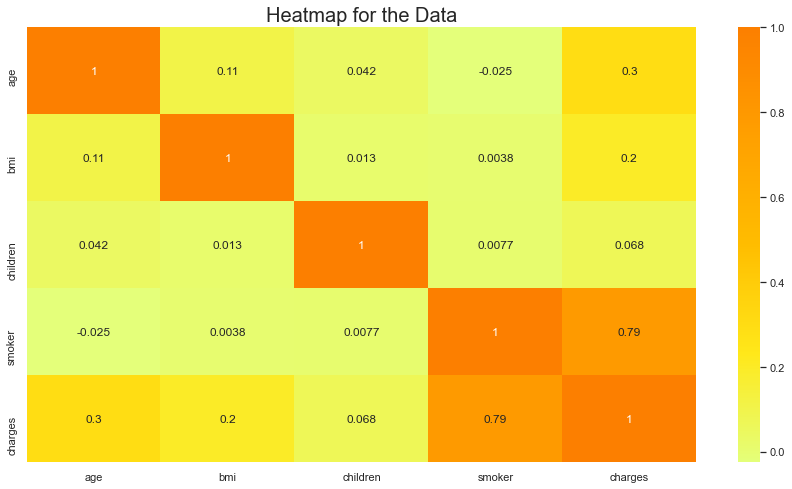

In [53]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(df.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

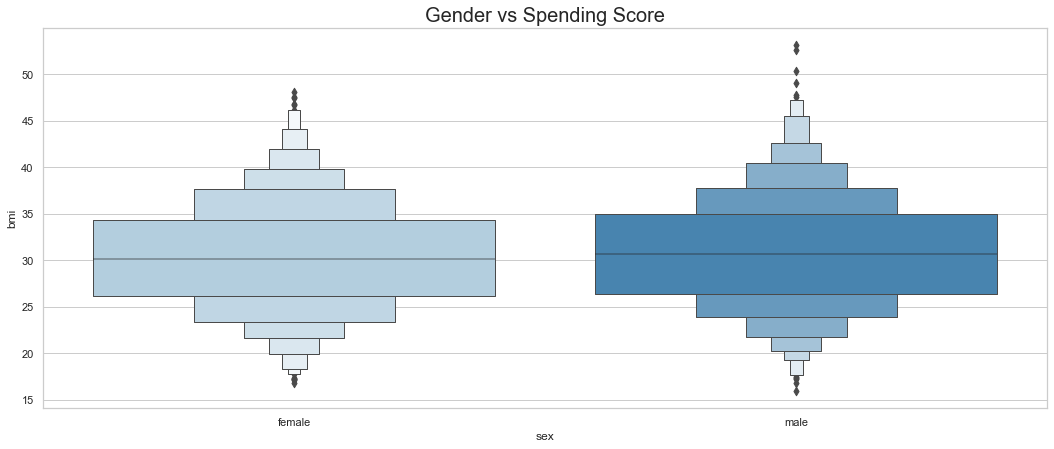

In [54]:
#  Gender vs Spendscore

plt.rcParams['figure.figsize'] = (18, 7)
sns.boxenplot(df['sex'], df['bmi'], palette = 'Blues')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()



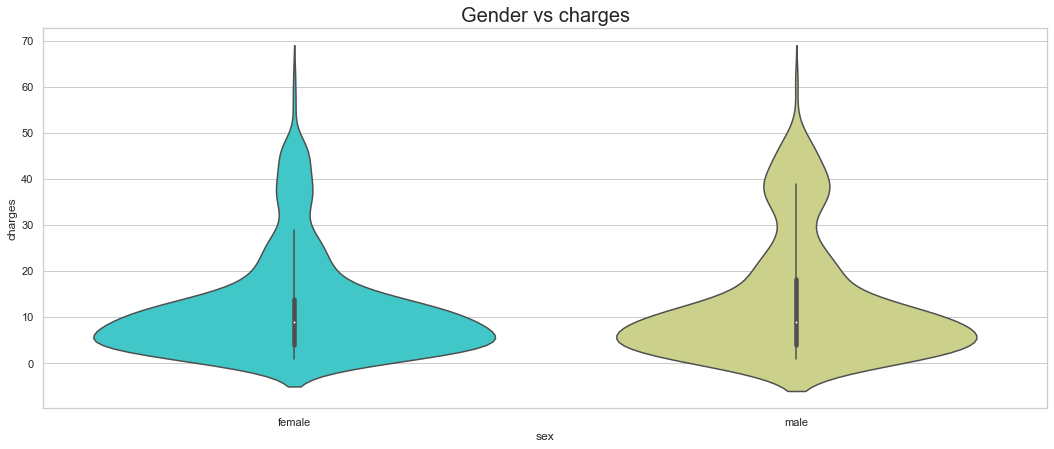

In [56]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.violinplot(df['sex'], df['charges'], palette = 'rainbow')
plt.title('Gender vs charges', fontsize = 20)
plt.show()

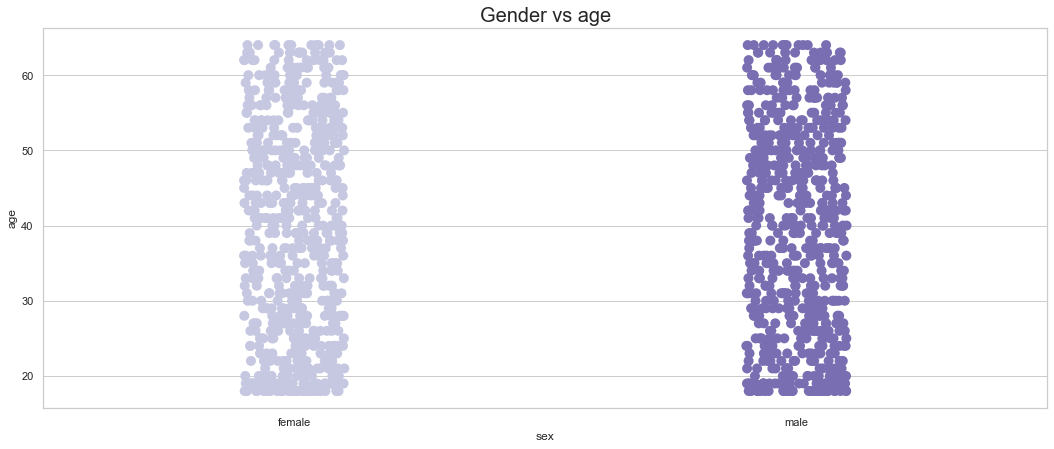

In [58]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.stripplot(df['sex'], df['age'], palette = 'Purples', size = 10)
plt.title('Gender vs age', fontsize = 20)
plt.show()

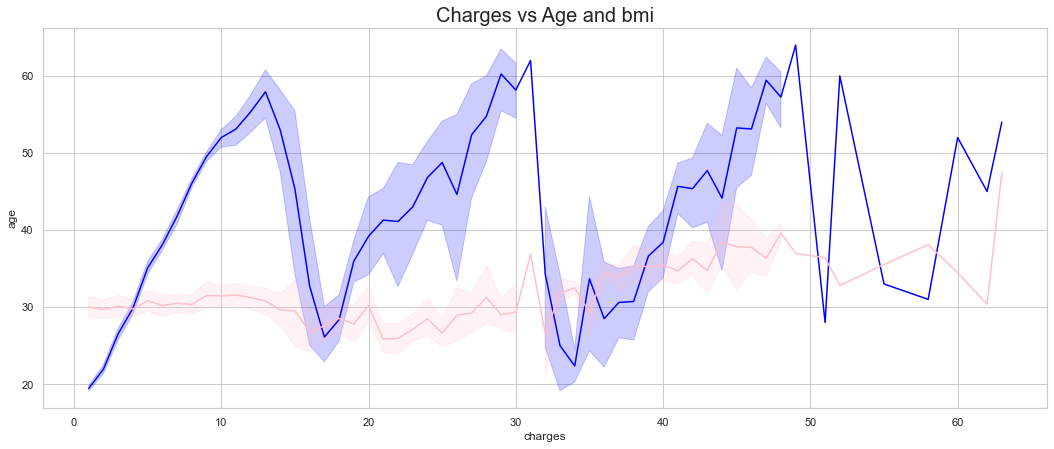

In [60]:
x = df['charges']
y = df['age']
z = df['bmi']

sns.lineplot(x, y, color = 'blue')
sns.lineplot(x, z, color = 'pink')
plt.title('Charges vs Age and bmi', fontsize = 20)
plt.show()

## CLUSTERING DATA



### AGE AND CHARGING CLUSTERISATION

In [63]:
x = df.iloc[:, [0, 6]].values

# let's check the shape of x
print(x.shape)


(1338, 2)


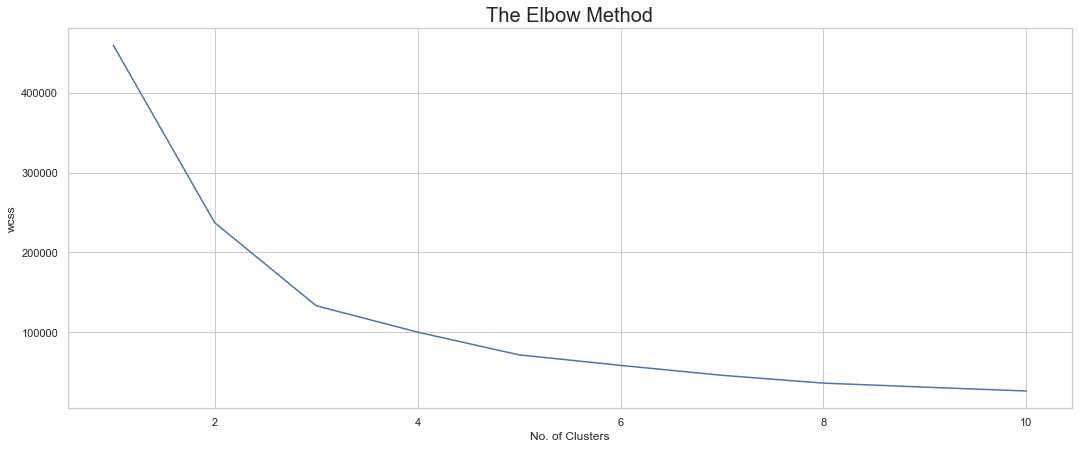

In [64]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()



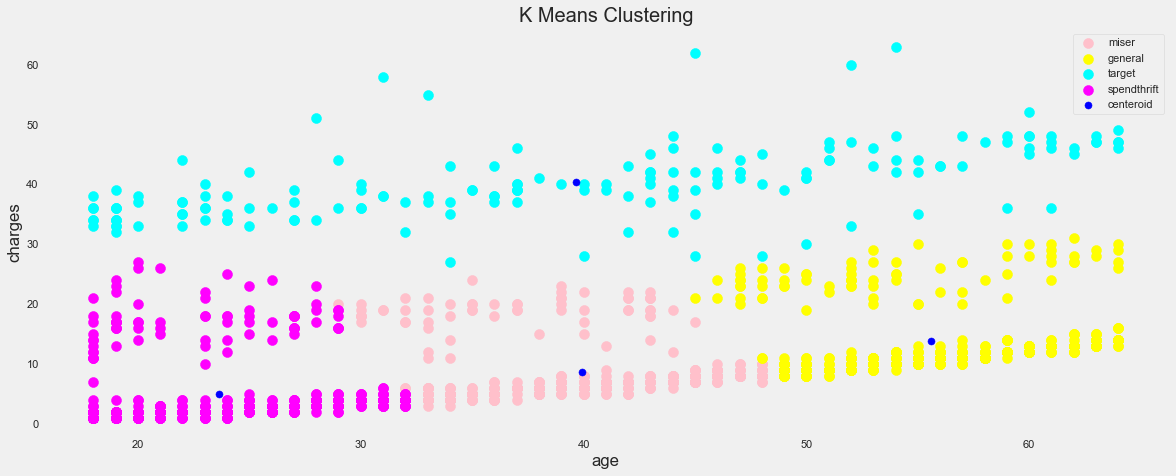

In [67]:


km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('age')
plt.ylabel('charges')
plt.legend()
plt.grid()
plt.show()



In [69]:
x = df.iloc[:, [0, 2]].values

# let's check the shape of x
print(x.shape)

(1338, 2)


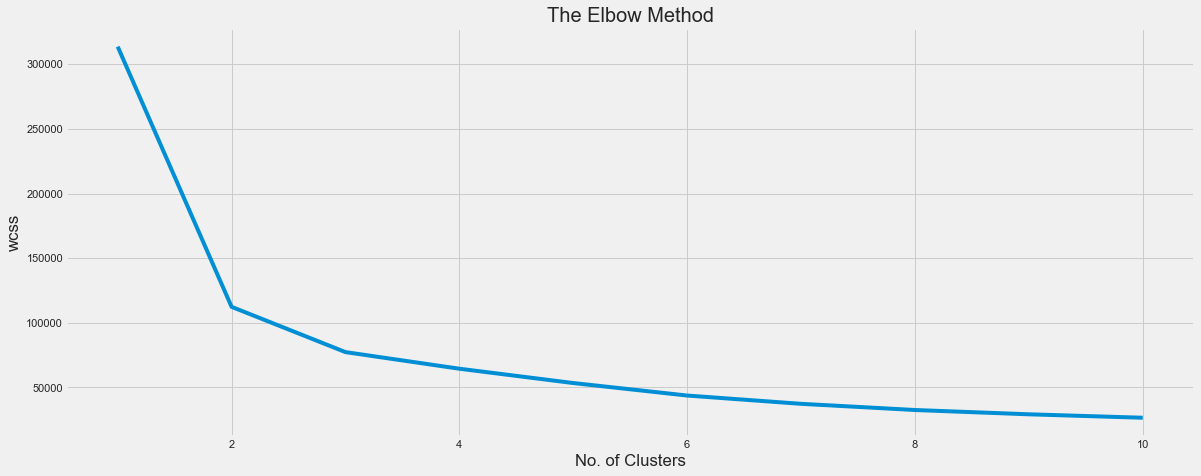

In [70]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()


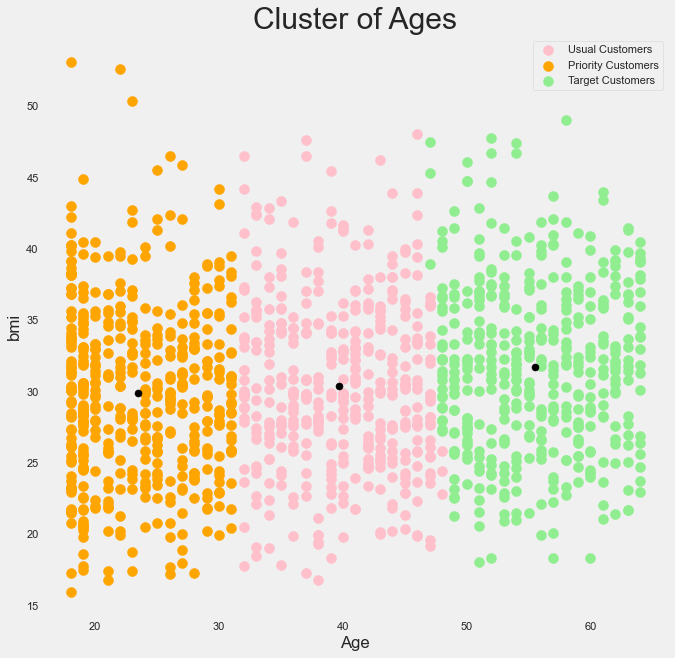

In [73]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Cluster of Ages', fontsize = 30)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'pink', label = 'Usual Customers' )
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'orange', label = 'Priority Customers')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Target Customers')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

plt.style.use('fivethirtyeight')
plt.xlabel('Age')
plt.ylabel('bmi')
plt.legend()
plt.grid()
plt.show()